# Python Setup Checks

To test that your python setup is looking good please select the `Cell` menu above and click on `Run All`

## Check your Conda environment and Python version

Look for the active environment in the output of the following command. It should be `fmad`. Also check the Python version you are using.

In [21]:
!conda info


     active environment : fmad
    active env location : /Users/fernando/miniforge3/envs/fmad
            shell level : 3
       user config file : /Users/fernando/.condarc
 populated config files : /Users/fernando/miniforge3/.condarc
                          /Users/fernando/.condarc
          conda version : 4.14.0
    conda-build version : not installed
         python version : 3.9.5.final.0
       virtual packages : __osx=12.5.1=0
                          __unix=0=0
                          __archspec=1=arm64
       base environment : /Users/fernando/miniforge3  (writable)
      conda av data dir : /Users/fernando/miniforge3/etc/conda
  conda av metadata url : None
           channel URLs : https://conda.anaconda.org/conda-forge/osx-arm64
                          https://conda.anaconda.org/conda-forge/noarch
          package cache : /Users/fernando/miniforge3/pkgs
                          /Users/fernando/.conda/pkgs
       envs directories : /Users/fernando/miniforge3/envs
 

## Check the Basic Libraries for Data Science with Python

### NumPy 

Check the numpy version and make sure that no errors appear in the output of the code cells below.

In [22]:
import numpy as np
print(np.__version__)

1.23.2


**Note about standard imports:**

+ Many of the Python libraries we will use have standard import names. Even though these are not official names, we strongly recommend their use, in order to make your code readable and compatible. For example, as we have just seen, NumPy should always be imported as `np`.

In [23]:
a = np.random.rand(1000)
%timeit a @ a

639 ns ± 2.27 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


### Pandas

Similarly for Pandas and the rest of the libraries.

In [24]:
# Standard import for Pandas
import pandas as pd
print(pd.__version__)

1.4.3


### MatplotLib and Seaborn

In [25]:
# Standard import for Matplotlib
import matplotlib as mpl 
print(mpl.__version__)

# But we will more frequently use this import sequence
import matplotlib.pyplot as plt

3.5.3


In [26]:
# Standard import for Seaborn
import seaborn as sns
print(sns.__version__)

0.11.2


### Scikit-learn


In [27]:
# Standard import for Scikit-learn
import sklearn as sk 
print(sk. __version__) 

1.1.2


## Working with Pandas DataFrame, First Example.

+ For our first example we will use a data set called `titanic`, which is contained in the Seaborn library that you should have already installed. The data set contains information about the passengers of the Titanic, such as their age, gender, class in which they were traveling, whether they survived the ship shinking, etc.  

+ We will soon see how to use Python to read data from different sources: csv and Excel files, urls, databases, APIs, etc. But for now we just want to run some tests and get an overview of the data structures we will be working with.  

In [28]:
titanic = sns.load_dataset('titanic')
print(type(titanic))

<class 'pandas.core.frame.DataFrame'>


As you can see, `titanic` is now a Pandas DataFrame. This is the object that we will most frequently meet when working with data tables (alongside with NumPy arrays). To see the first lines of the `titanic` data set we can use the `head` method. The optional `n` argument determines the number of rows in the output (the default is `n = 5`). 

In [29]:
print(titanic.head(n = 4))

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  


**Exercise:** try running the above with other values of `n`. Also run it as `print(titanic.head(4))`. Use the *Help* menu to open the *Reference* link and look up the information about the `head` method for Pandas DataFrames. 

**Note:** you may have noticed sone `NaN` values in the `deck` column of the table. This are *missing data*. We will see how to deal with missing data later in the course. 

### Basic properties of a DataFrame

How many rows and columns of data are there in this data set? We get the answer with `shape`:

In [30]:
print(titanic.shape)

(891, 15)


If you just use

```
print(titanic)
```

you will get a summary of the table and the shape information will appear below. 

To see the *column names* we use, quite naturally:

In [31]:
print(titanic.columns)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


As we see, the column names are stored in an `Index` object. We will learn more about indices later in the course. 

Sometimes the row names can contain information as well. They are also stored in an index which can be accessed with:

In [32]:
print(titanic.index)

RangeIndex(start=0, stop=891, step=1)


### Accessing the data

+ We can get any element in the data table using brackets, the `iloc` method and row/column pairs. For example:

In [33]:
titanic.iloc[1, 3]

38.0

shows that the element of the second row and fourth column in the table is `38.0`. 

**Always keep in mind that Python counts are zero-based!!** Thus index zero corresponds to the first element in an ordered set.

In a data table the columns usually correspond to variables and the rows correspond to observations. And we should have a very good reason to do otherwise!! In the above example, the fourth column corresponds to the `age` variable of the Titanic passengers. It is often better to refer to variables by their names. We can do it with the `loc` method:

In [34]:
titanic.loc[1, 'age']

38.0

In this cases the row indices are numeric (in fact, consecutive zero-based integers), so we can use 1 with `loc` or `iloc` to select a row. 

We could also first extract the `age` column:

In [35]:
ttnc_age = titanic['age']
print(ttnc_age)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64


What kind of object is this column?

In [36]:
print(type(ttnc_age))

<class 'pandas.core.series.Series'>


As we see, it is a *Pandas Series* object. A DataFrame can be considered as a collection of Series (columns) with a common (row) index.  

**Note:** the `age` column can also be accessed as an attribute of the table, with `titanic.age`. Usually we prefer the bracket method, but this *attribute notation* can be handy when we want to shorten our code sentences. 

### Modifying data

+ The `loc` and `iloc` methods can also be used to modify elements of the table. Let us modify the age of that passenger and check the result with head:

In [37]:
titanic.iloc[1, 3] = 19.0

print(titanic.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  19.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


**Exercise:** now use `iloc` to return the age of the passenger to the original `38.0` value and check your work with `head`. 

### Accessing larger portions of the DataFrame (indexing and slicing)


+ If we want to access several rows and or columns we can use explicit *indexing* (note that the order is relevant) 

In [46]:
titanic.loc[[0, 1, 2, 3, 4] , ['sex', 'age', 'survived', 'pclass']]

,sex,age,survived,pclass
0,male,22.0,0,3
1,female,19.0,1,1
2,female,26.0,1,3
3,female,35.0,1,1
4,male,35.0,0,3


or we can use *slicing* with the colon`:` to get consecutive rows or columns:

In [48]:
titanic.loc[:4 , 'survived':'age']

,survived,pclass,sex,age
0,0,3,male,22.0
1,1,1,female,19.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


**Warning:** contrary to the usual Python (and NumPy) convention, the final values 4 and age of the indices are included in the output for `loc`.

+ In the above we have used `loc` but you can also use numeric positions with `iloc`. **Note**, however, that the final values of the numeric indexes are excluded for `iloc` output:

In [51]:
titanic.iloc[:4, :3]

,survived,pclass,sex
0,0,3,male
1,1,1,female
2,1,3,female
3,1,1,female


### Condition based filtering

+ One of the most powerful tools in data analysis is the ability to filter only those rows of a data table that meet some condition, usually expressed as a *boolean* condition. For example, we will filter the `titanic` DataFrame, keeping only the rows corresponding to female passengers with ages equal or greater than 25 years (observe the use of the attribute notation we mentioned before).   

In [61]:
ttnc_female_25plus = titanic.loc[(titanic.age >= 25) &  (titanic.sex == 'female')]

print(ttnc_female_25plus.head())

    survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
2          1       3  female  26.0      0      0   7.9250        S   Third   
3          1       1  female  35.0      1      0  53.1000        S   First   
8          1       3  female  27.0      0      2  11.1333        S   Third   
11         1       1  female  58.0      0      0  26.5500        S   First   
15         1       2  female  55.0      0      0  16.0000        S  Second   

      who  adult_male deck  embark_town alive  alone  
2   woman       False  NaN  Southampton   yes   True  
3   woman       False    C  Southampton   yes  False  
8   woman       False  NaN  Southampton   yes  False  
11  woman       False    C  Southampton   yes   True  
15  woman       False  NaN  Southampton   yes   True  


## Some final fun for the session

In [64]:
gapminder = pd.read_csv('data/gapminder.csv', index_col = 0)
print(gapminder.head())
gdp_cap = gapminder.iloc[:, -1].tolist()
life_exp = gapminder.iloc[:, -2].tolist()
pop = gapminder.iloc[:, 2].tolist()
cont = gapminder.iloc[:, 3].tolist()
continentColors = {
    'Asia':'red',
    'Europe':'green',
    'Africa':'blue',
    'Americas':'yellow',
    'Oceania':'black'
}

        country  year  population      cont  life_exp       gdp_cap
11  Afghanistan  2007  31889923.0      Asia    43.828    974.580338
23      Albania  2007   3600523.0    Europe    76.423   5937.029526
35      Algeria  2007  33333216.0    Africa    72.301   6223.367465
47       Angola  2007  12420476.0    Africa    42.731   4797.231267
59    Argentina  2007  40301927.0  Americas    75.320  12779.379640


In [68]:
plt.rcParams_old = plt.rcParams

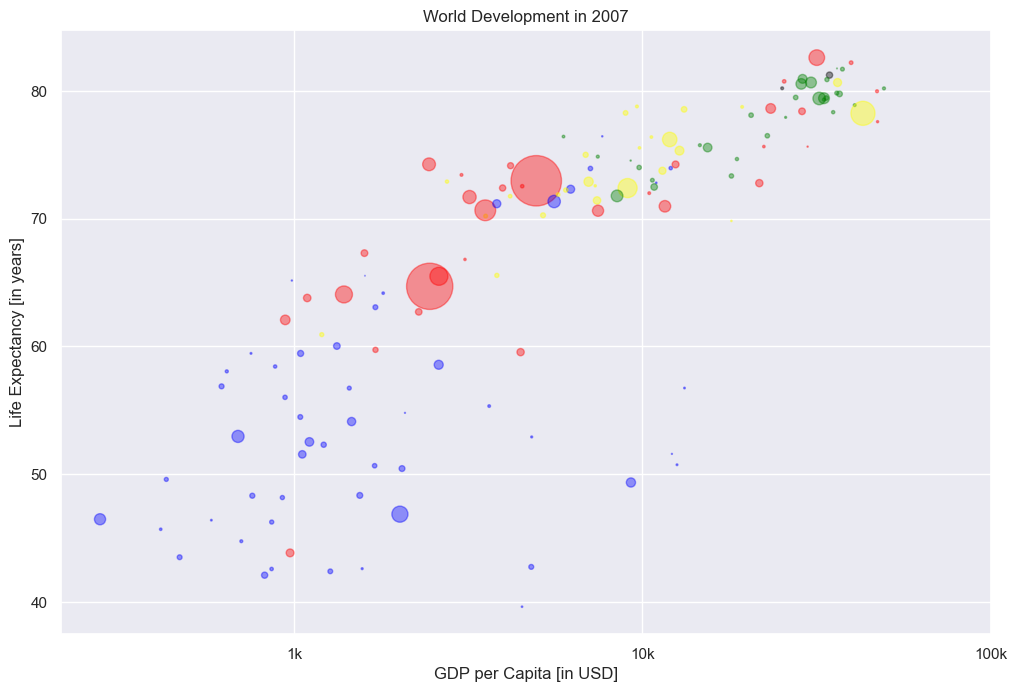

<Figure size 1200x800 with 0 Axes>

In [75]:
%matplotlib inline

sns.set()

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

col = [continentColors[item] for item in cont]

# Specify c and alpha inside plt.scatter()
plt.scatter(x = gdp_cap, y = life_exp, s = np.array(pop) /1000000,
c = col, alpha = 0.4)

# Customizations
plt.xscale('log')
plt.xlabel('GDP per Capita [in USD]')
plt.ylabel('Life Expectancy [in years]')
plt.title('World Development in 2007')
plt.xticks([1000,10000,100000], ['1k','10k','100k'])
plt.grid(True)

# Show the plot
plt.show()
plt.clf()